In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
X_train = pd.read_csv("/kaggle/input/ibm-classification-feature-selection/X_train_normalized.csv", index_col=[0])
X_test = pd.read_csv("/kaggle/input/ibm-classification-feature-selection/X_test_normalized.csv", index_col=[0])
y_train = pd.read_csv("/kaggle/input/ibm-classification-feature-selection/y_train.csv", index_col=[0])
y_test = pd.read_csv("/kaggle/input/ibm-classification-feature-selection/y_test.csv", index_col=[0]).reset_index(drop=True)

In [3]:
X_train.head(5)

,Symbol,Volume,S&P500,Unemployment Rate (%),Consumer Confidence Index,Inflation (%),Monthly Average Mortgage Rate (%),Corporate Bond Yield,Quarterly GDP Growth Rate (%),Home Price Index,...,Volume 7-Day std,Distance to Adj Close 7-Day Upper Bollinger Band,Distance to Adj Close 7-Day Lower Bollinger Band,True Range,MACD,MACD Histogram,MACD-V,MACD-V Histogram,Stochastic Oscillator %K,Stochastic Oscillator Histogram
0,-0.410114,-0.210705,-1.320754,0.511994,-1.177003,0.249919,0.554926,0.978426,0.308545,-1.281032,...,-0.258043,0.252546,-0.247691,2.618721,-0.260366,-0.172665,-0.224370,-0.050503,-0.968857,0.403609
1,-1.543043,-0.259618,-1.320754,0.511994,-1.177003,0.249919,0.554926,0.978426,0.308545,-1.281032,...,-0.219756,0.253538,-0.258108,1.496218,-0.147530,-0.050576,-0.201860,-0.024063,-0.276252,1.159562
2,1.315196,-0.290298,-1.320754,0.511994,-1.177003,0.249919,0.554926,0.978426,0.308545,-1.281032,...,-0.301006,0.254937,-0.146002,-0.457713,-0.162553,0.083849,-0.302745,0.159898,0.943899,0.917055
3,-0.735924,-0.190582,-1.320754,0.511994,-1.177003,0.249919,0.554926,0.978426,0.308545,-1.281032,...,-0.097755,0.197255,-0.173862,1.492174,-0.186836,0.017846,-0.217214,0.002322,0.137859,0.943716
4,-0.113924,-0.271816,-1.320754,0.511994,-1.177003,0.249919,0.554926,0.978426,0.308545,-1.281032,...,-0.214628,0.252618,-0.021615,1.735127,-0.331101,0.031545,-0.262816,0.005637,0.455711,1.701318


In [4]:
X_test.head(5)

,Symbol,Volume,S&P500,Unemployment Rate (%),Consumer Confidence Index,Inflation (%),Monthly Average Mortgage Rate (%),Corporate Bond Yield,Quarterly GDP Growth Rate (%),Home Price Index,...,Volume 7-Day std,Distance to Adj Close 7-Day Upper Bollinger Band,Distance to Adj Close 7-Day Lower Bollinger Band,True Range,MACD,MACD Histogram,MACD-V,MACD-V Histogram,Stochastic Oscillator %K,Stochastic Oscillator Histogram
0,1.396648,-0.326573,2.510194,0.662575,-1.366589,-0.113579,-2.391852,-1.975172,0.463865,-1.90487,...,-0.306391,-1.527961,-0.125677,-0.246921,0.089484,-1.106535,0.218287,-2.621050,-1.641906,-1.219251
1,1.455886,-0.227595,2.510194,0.662575,-1.366589,-0.113579,-2.391852,-1.975172,0.463865,-1.90487,...,-0.245503,0.177113,-0.307846,-0.717370,-0.007774,-0.231162,0.154164,-0.788887,-1.136225,-1.587442
2,-1.491210,0.103538,2.510194,0.662575,-1.366589,-0.113579,-2.391852,-1.975172,0.463865,-1.90487,...,0.014451,0.248926,-0.309200,-0.387987,0.092422,-0.027867,0.105246,-0.040281,0.229428,-0.452991
3,-1.476400,-0.068648,2.510194,0.662575,-1.366589,-0.113579,-2.391852,-1.975172,0.463865,-1.90487,...,-0.132804,-0.755328,-0.236717,0.727916,-0.083394,-0.605208,-0.176409,-0.314759,-1.409434,-0.622200
4,1.241148,-0.327627,2.510194,0.662575,-1.366589,-0.113579,-2.391852,-1.975172,0.463865,-1.90487,...,-0.307790,-0.018812,0.066620,-0.092791,0.313792,0.148795,0.240053,0.162207,0.371201,-0.831702


In [5]:
y_train.head(5)

,1-week Forward Return Sign
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0


In [6]:
y_test.head(5)

,1-week Forward Return Sign
0,1.0
1,1.0
2,1.0
3,-1.0
4,1.0


# Intro to SVMs

#### Intro

Support Vector Machines for classification use a hyperplane to separate data points into classes. New data points are assigned a class based on which side of the hyperlane it lies. Therefore, it is a NON-PROBABILISTIC binary classifier (as opposed to logistic regression which outputs probabilities). SVMs can perform a linear classification but also non-linear classification using the *kernel trick* which allows us to map inputs into higher dimensional space.

#### Detail

* SVMs separate data points into two classes using a hyperplane with the maximum amount of *margin*.
* *Margin* is the separation gap between the two lines through the closest points to the hyperplane, which are called *support vectors*
* The SVM algorithm seeks to find the optimal hyperplane that maximises this margin.

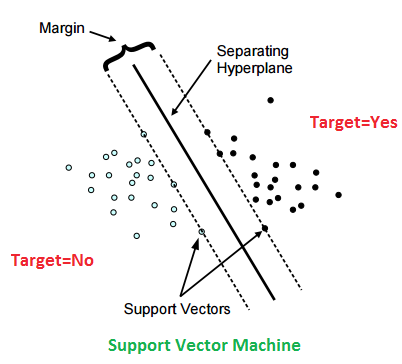

#### The Kernel Trick

Sometimes the data points are not linearly separable. We can use a *kernel* which is simply a function that maps the data to a higher dimension so that the data becomes linearly separable. Some examples are shown below.

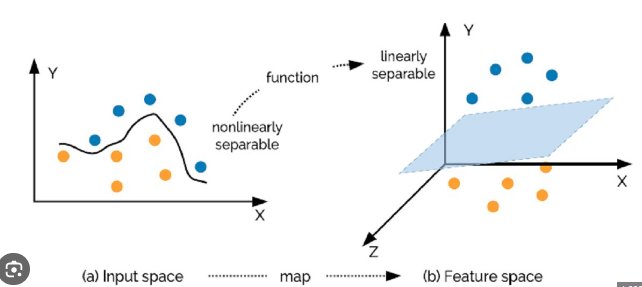

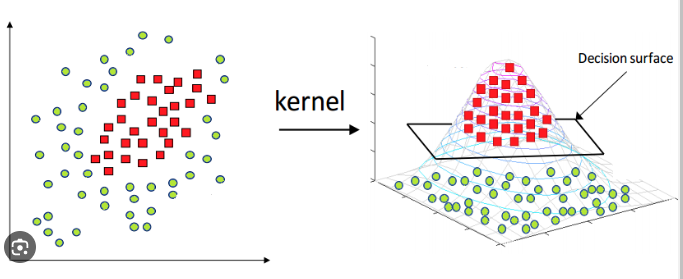

There are quite a few different kernel types but here are 4 common ones. They each take two vectors x and y as input and return a scalar. This scalar gives us a notion of similarity between points in the higher dimensional space. These similarities can then be used in the algorithm to maximize the margin (distance between support vectors either side of the optimal hyperplane)

**Linear Kernel**

This is the simplest kernel simply given by the inner product of two vectors.

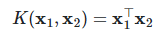

Training using this kernel results in an untransformed feature space where the hyperplane and margins are straight lines (in high dimensions). This is shown below.

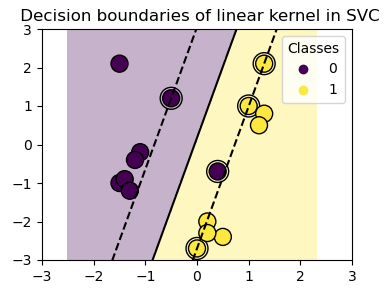

**Polynomial Kernel**

This kernel is defined as: 

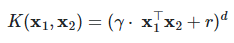

where d controls the degree of the polynomial, gamma controls the influence of each individual training sample of the decision boundary and r is the bias term that shifts the data up or down. This function can transform the feature space and the higher the value of d, the more complex bending we can do. An example is shown below.

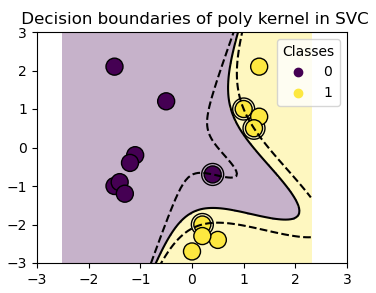

**Radial Basis Function (Gaussian Kernel)**

This kernel is defined as:

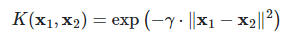

where gamma controls the influence of each individual training sample on the decision boundary. This function allows us to do more fancy things than just bend the decision boundary. We can actually form multiple decision boundaries, as shown below.

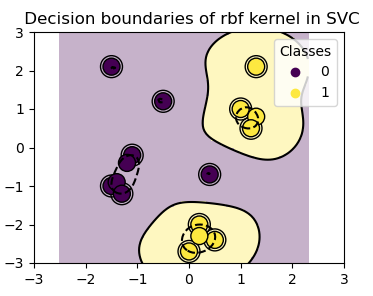

  
**Sigmoid Kernel**

This kernel is defined as:

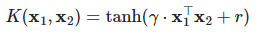

where gamma controls the influence of each individual training sample and r is the bias term that shifts the data up or down. The decision boundaries with this function can be quite irregular and result in a complex boundary that may not generalize well to unseen data. It therefore isn't commonly used as is only good in specific use cases where the data exhibits a sigmoidal shape.

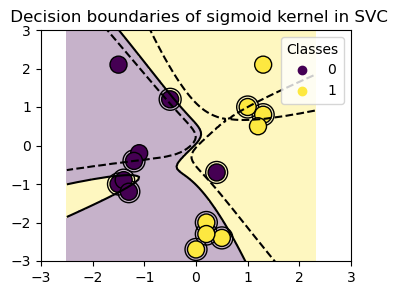

In [7]:
# https://scikit-learn.org/stable/auto_examples/svm/plot_svm_kernels.html#sphx-glr-auto-examples-svm-plot-svm-kernels-py
# Use this for plotting decision boundaries and for reference.

In [8]:
# IDEA: TO visualise the saparation once trained, can use a historagm of projection using sklearn's decision_function() function. See here https://towardsdatascience.com/a-practical-guide-to-interpreting-and-visualising-support-vector-machines-97d2a5b0564e

# Fit SVM

In [9]:
from sklearn.svm import SVC

In [10]:
svm = SVC()
svm.fit(X_train.head(100), y_train.head(100))

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()